In [1]:
from scDeepGMM import *

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import scDeepGMM

# Cortex

In [3]:
dataMgr = Cortex(
    batch_size=512,
    split=0)

In [4]:
dataMgr.getX().shape

torch.Size([3005, 558])

In [5]:
params = {
          'n_clusters'  : 6,
          'n_hidden'    : [150,100,50],
          'latent_size' : 32,
          'warm_up_epoch': 20,
          'epochs'      : 200,
          'warm_up_clusters': 5.,
          'learning_rate': 2e-3
        }

In [6]:
gmvae = GMVAE(
  n_input=dataMgr.raw_data.shape[1], 
  n_hidden=params['n_hidden'], 
  latent_size=params['latent_size'], 
  n_clusters=params['n_clusters']
)

In [7]:
# x=iter(dataMgr.train_loader).next()['x']

# gmvae.init_gmm(x)

# train(
#   gmvae, 
#   train_loader=dataMgr.train_loader,      # Added validation loader (split parameter in datamgr must be > 0)
#   num_epochs=params['epochs'],
#   warm_up_epoch = params['warm_up_epoch'],
#   weight_decay=1e-6,
#   learning_rate=params['learning_rate'],
#   seed=1,
#     mmd_ind=False,
#     file_ind =False,
#   verbose=True,                           # Added verbose parameter
#   patience=10,                             # Added patience parameter
#     save_file="cortex2.pt")
gmvae.load_state_dict(torch.load("modelDeepGMM/cortex2.pt")['State Dict'])

<All keys matched successfully>

In [8]:
latent_y = gmvae.get_latent_y(torch.Tensor(dataMgr.getX()))  # Latent y
guesses = np.argmax(latent_y, 1)

In [9]:
guesses.unique()

tensor([0, 1, 3, 4, 5])

In [10]:
NMI(dataMgr.raw_data.obs['clusters'], guesses)

0.6503915862027547

In [11]:
ARI(dataMgr.raw_data.obs['clusters'],guesses)

0.6073771693595881

In [12]:
latent_z = gmvae.get_latent_z(torch.Tensor(dataMgr.getX()))  # Latent y

In [13]:
post_adata = sc.AnnData(X=dataMgr.getX().numpy())
post_adata.obsm["X_latent"] = latent_z.cpu().detach().numpy()

In [14]:
post_adata.obs['cell_type'] = dataMgr.raw_data.obs['precise_clusters'].values.astype('str')
post_adata.obs['predicted_clusters'] = guesses.numpy().astype('str')

... storing 'cell_type' as categorical
... storing 'predicted_clusters' as categorical


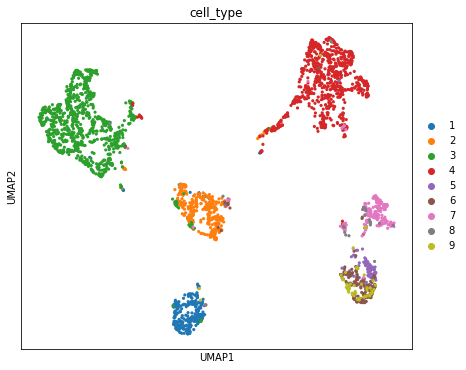

In [15]:
#post_adata.obs['cell_type'] = [labels[guess] for guess in guesses]
sc.pp.neighbors(post_adata, use_rep="X_latent", n_neighbors=15)
sc.tl.umap(post_adata, min_dist=0.1)
fig, ax = plt.subplots(figsize=(7, 6))
sc.pl.umap(post_adata, color=["cell_type"], ax=ax)

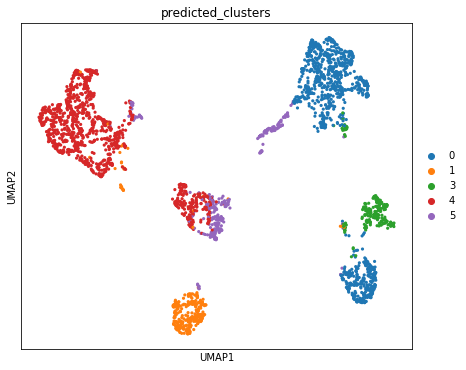

In [16]:
fig, ax = plt.subplots(figsize=(7, 6))
sc.pl.umap(post_adata, color=["predicted_clusters"], ax=ax)

In [17]:
sc.tl.tsne(post_adata, use_rep="X_latent")

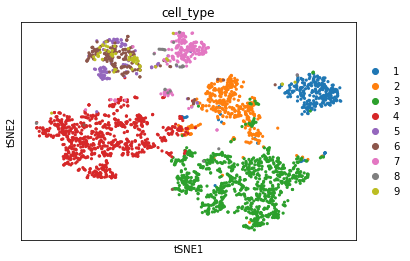

In [18]:
sc.pl.tsne(post_adata,color=['cell_type'])

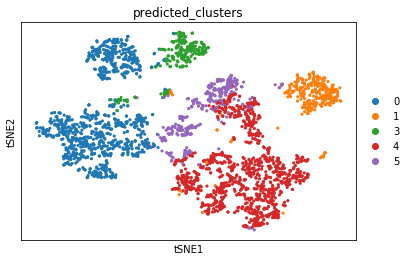

In [19]:
sc.pl.tsne(post_adata,color=['predicted_clusters'])

# Mouse ES

In [20]:
dataMgr = DataWithClusters(300,file_path = "./data/with_cluster/mouse_ES_cell_select_2100.h5")

In [21]:
dataMgr.getX().shape

torch.Size([2100, 5834])

In [22]:
params = {
          'n_clusters'  : 4,
          'n_hidden'    : [1048,512,256,128],
          'latent_size' : 32,
          'warm_up_epoch': 20,
          'epochs'      : 200,
          'warm_up_clusters': 5.,
          'learning_rate': 2e-3
        }

In [23]:
dataMgr.raw_data.shape[1]

24175

In [24]:
gmvae = GMVAE(
  n_input=dataMgr.getX().shape[1], 
  n_hidden=params['n_hidden'], 
  latent_size=params['latent_size'], 
  n_clusters=params['n_clusters']
)

In [25]:
# x=iter(dataMgr.train_loader).next()['x']

# gmvae.init_gmm(x)

# train(
#   gmvae, 
#   train_loader=dataMgr.train_loader,      # Added validation loader (split parameter in datamgr must be > 0)
#   num_epochs=params['epochs'],
#   warm_up_epoch = params['warm_up_epoch'],
#   weight_decay=1e-6,
#   learning_rate=params['learning_rate'],
#   seed=1,
#     mmd_ind=False,
#     file_ind =False,
#   verbose=True,                           # Added verbose parameter
#   patience=10,                             # Added patience parameter
#     save_file="mouse_es.pt")
gmvae.load_state_dict(torch.load("modelDeepGMM/mouse_es.pt")['State Dict'])

<All keys matched successfully>

In [26]:
latent_y = gmvae.get_latent_y(torch.Tensor(dataMgr.getX()))  # Latent y
guesses = np.argmax(latent_y, 1)

In [27]:
guesses.unique()

tensor([0, 1, 2, 3])

In [28]:
NMI(dataMgr.raw_data.uns['Y'], guesses)

0.7157003793434866

In [29]:
ARI(dataMgr.raw_data.uns['Y'],guesses)

0.6816068653876517

In [30]:
latent_z = gmvae.get_latent_z(torch.Tensor(dataMgr.getX()))  # Latent y

In [31]:
post_adata = sc.AnnData(X=dataMgr.getX().numpy())
post_adata.obsm["X_latent"] = latent_z.cpu().detach().numpy()

In [32]:
post_adata.obs['cell_type'] = dataMgr.raw_data.obs['precise_clusters'].values.astype('str')
post_adata.obs['predicted_clusters'] = guesses.numpy().astype('str')

... storing 'cell_type' as categorical
... storing 'predicted_clusters' as categorical


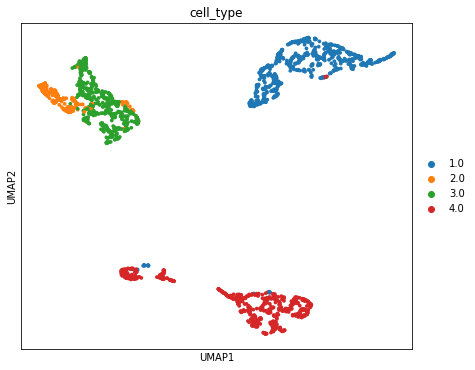

In [33]:
#post_adata.obs['cell_type'] = [labels[guess] for guess in guesses]
sc.pp.neighbors(post_adata, use_rep="X_latent", n_neighbors=15)
sc.tl.umap(post_adata, min_dist=0.1)
fig, ax = plt.subplots(figsize=(7, 6))
sc.pl.umap(post_adata, color=["cell_type"], ax=ax)

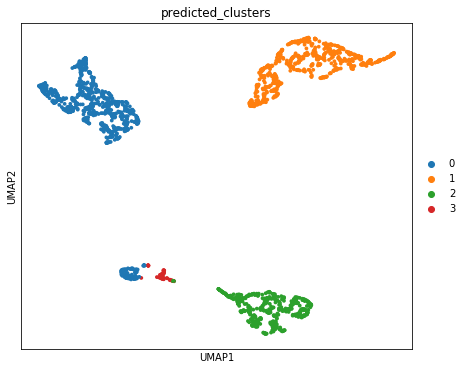

In [34]:
fig, ax = plt.subplots(figsize=(7, 6))
sc.pl.umap(post_adata, color=["predicted_clusters"], ax=ax)

In [35]:
sc.tl.tsne(post_adata, use_rep="X_latent")

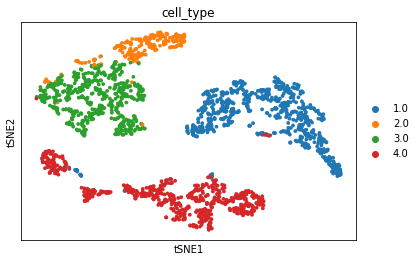

In [36]:
sc.pl.tsne(post_adata,color=['cell_type'])

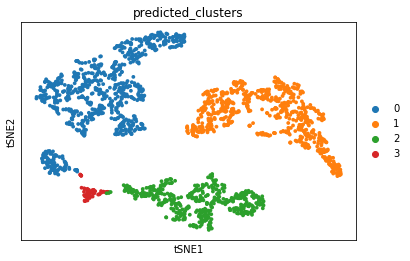

In [37]:
sc.pl.tsne(post_adata,color=['predicted_clusters'])

# PBMC clusters

In [38]:
dataMgr = DataWithClusters(700)

In [39]:
dataMgr.raw_data.obsm['X'].shape

(2100, 1980)

In [40]:
params = {
          'n_clusters'  : 8,
          'n_hidden'    : [1048,512,256,128],
          'latent_size' : 32,
          'warm_up_epoch': 20,
          'epochs'      : 200,
          'warm_up_clusters': 5.,
          'learning_rate': 2e-3
        }

In [41]:
gmvae = GMVAE(
  n_input=dataMgr.getX().shape[1], 
  n_hidden=params['n_hidden'], 
  latent_size=params['latent_size'], 
  n_clusters=params['n_clusters']
)

In [42]:
# x=iter(dataMgr.train_loader).next()['x']
# gmvae.init_gmm(x)

In [43]:
# train(
#   gmvae, 
#   train_loader=dataMgr.train_loader,      # Added validation loader (split parameter in datamgr must be > 0)
#   num_epochs=params['epochs'],
#   warm_up_epoch = params['warm_up_epoch'],
#   weight_decay=1e-6,
#   learning_rate=params['learning_rate'],
#   seed=1,
#     mmd_ind=False,
#     file_ind =False,
#   verbose=True,                           # Added verbose parameter
#   patience=10,                             # Added patience parameter
#     save_file="pbmc_clus.pt")
gmvae.load_state_dict(torch.load("modelDeepGMM/pbmc_clus.pt")['State Dict'])

<All keys matched successfully>

In [44]:
latent_y = gmvae.get_latent_y(torch.Tensor(dataMgr.getX()))  # Latent y
guesses = np.argmax(latent_y, 1)

In [45]:
guesses.unique()

tensor([0, 2, 3, 4, 5, 7])

In [46]:
NMI(dataMgr.raw_data.uns['Y'], guesses)

0.713864206790029

In [47]:
ARI(dataMgr.raw_data.uns['Y'],guesses)

0.6143329014625588

In [48]:
latent_z = gmvae.get_latent_z(torch.Tensor(dataMgr.getX()))  # Latent y

In [49]:
post_adata = sc.AnnData(X=dataMgr.getX().numpy())
post_adata.obsm["X_latent"] = latent_z.cpu().detach().numpy()

In [50]:
post_adata.obs['cell_type'] = dataMgr.raw_data.obs['precise_clusters'].values.astype('str')
post_adata.obs['predicted_clusters'] = guesses.numpy().astype('str')

/home/grad/jiangyuanli/miniconda/envs/py37/lib/python3.7/site-packages/umap_learn-0.3.10-py3.7.egg/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
... storing 'cell_type' as categorical
... storing 'predicted_clusters' as categorical


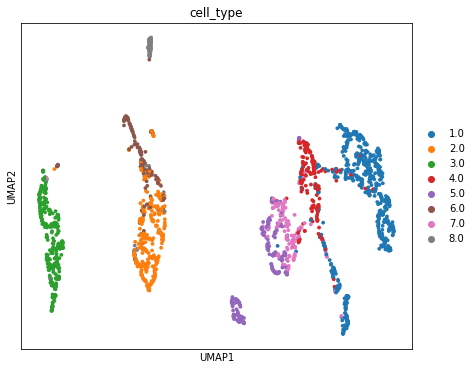

In [51]:
#post_adata.obs['cell_type'] = [labels[guess] for guess in guesses]
sc.pp.neighbors(post_adata, use_rep="X_latent", n_neighbors=15)
sc.tl.umap(post_adata, min_dist=0.1)
fig, ax = plt.subplots(figsize=(7, 6))
sc.pl.umap(post_adata, color=["cell_type"], ax=ax)

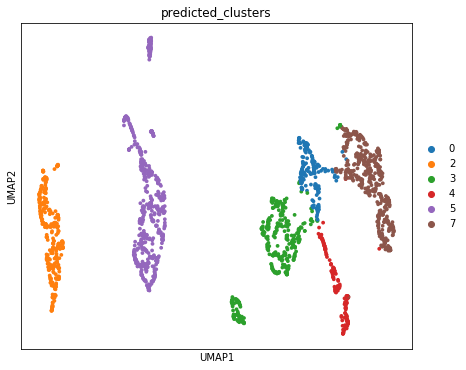

In [52]:
fig, ax = plt.subplots(figsize=(7, 6))
sc.pl.umap(post_adata, color=["predicted_clusters"], ax=ax)

In [53]:
sc.tl.tsne(post_adata, use_rep="X_latent")

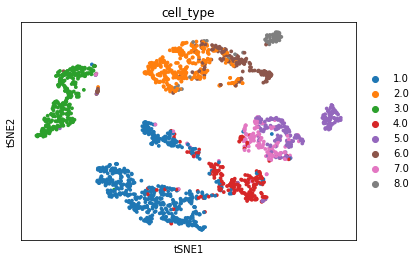

In [54]:
sc.pl.tsne(post_adata,color=['cell_type'])

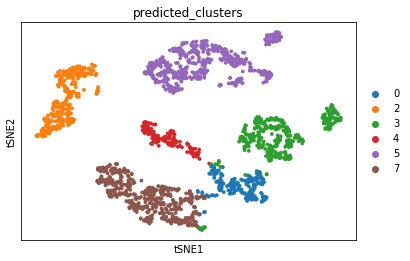

In [55]:
sc.pl.tsne(post_adata,color=['predicted_clusters'])

# Mouse bladder

In [56]:
dataMgr = DataWithClusters(700, file_path = "./data/with_cluster/mouse_bladder_cell_select_2100.h5")

In [57]:
dataMgr.getX().shape

torch.Size([2100, 4035])

In [58]:
params = {
          'n_clusters'  : 16,
          'n_hidden'    : [1048,512,256,128],
          'latent_size' : 32,
          'warm_up_epoch': 20,
          'epochs'      : 200,
          'warm_up_clusters': 5.,
          'learning_rate': 2e-3
        }

In [59]:
dataMgr.raw_data.shape[1]

20670

In [60]:
gmvae = GMVAE(
  n_input=dataMgr.getX().shape[1], 
  n_hidden=params['n_hidden'], 
  latent_size=params['latent_size'], 
  n_clusters=params['n_clusters']
)

In [61]:
# x=iter(dataMgr.train_loader).next()['x']
# gmvae.init_gmm(x)

In [62]:
# train(
#   gmvae, 
#   train_loader=dataMgr.train_loader,      # Added validation loader (split parameter in datamgr must be > 0)
#   num_epochs=params['epochs'],
#   warm_up_epoch = params['warm_up_epoch'],
#   weight_decay=1e-6,
#   learning_rate=params['learning_rate'],
#   seed=1,
#     mmd_ind=False,
#     file_ind =False,
#   verbose=True,                           # Added verbose parameter
#   patience=10,                             # Added patience parameter
#     save_file="mouse_bladder.pt")
gmvae.load_state_dict(torch.load("modelDeepGMM/mouse_bladder.pt")['State Dict'])

<All keys matched successfully>

In [63]:
latent_y = gmvae.get_latent_y(torch.Tensor(dataMgr.getX()))  # Latent y
guesses = np.argmax(latent_y, 1)

In [64]:
guesses.unique()

tensor([ 1,  3,  4,  5,  6,  9, 13, 14, 15])

In [65]:
NMI(dataMgr.raw_data.uns['Y'], guesses)

0.7248214407483501

In [66]:
ARI(dataMgr.raw_data.uns['Y'],guesses)

0.45009499159643096

In [67]:
latent_z = gmvae.get_latent_z(torch.Tensor(dataMgr.getX()))  # Latent y

In [68]:
post_adata = sc.AnnData(X=dataMgr.getX().numpy())
post_adata.obsm["X_latent"] = latent_z.cpu().detach().numpy()

In [69]:
post_adata.obs['cell_type'] = dataMgr.raw_data.obs['precise_clusters'].values.astype('str')
post_adata.obs['predicted_clusters'] = guesses.numpy().astype('str')

... storing 'cell_type' as categorical
... storing 'predicted_clusters' as categorical


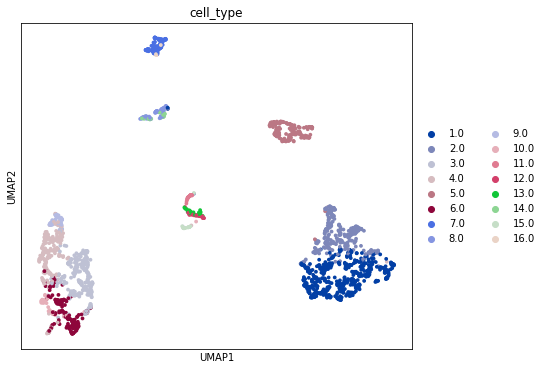

In [70]:
#post_adata.obs['cell_type'] = [labels[guess] for guess in guesses]
sc.pp.neighbors(post_adata, use_rep="X_latent", n_neighbors=15)
sc.tl.umap(post_adata, min_dist=0.1)
fig, ax = plt.subplots(figsize=(7, 6))
sc.pl.umap(post_adata, color=["cell_type"], ax=ax)

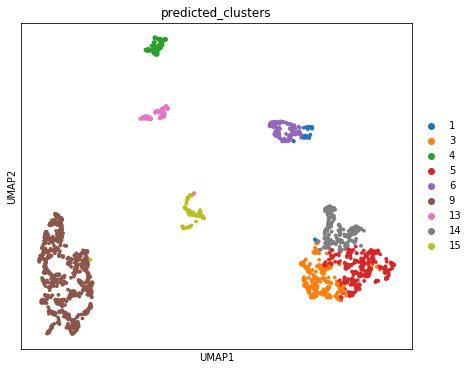

In [71]:
fig, ax = plt.subplots(figsize=(7, 6))
sc.pl.umap(post_adata, color=["predicted_clusters"], ax=ax)

In [72]:
sc.tl.tsne(post_adata, use_rep="X_latent")

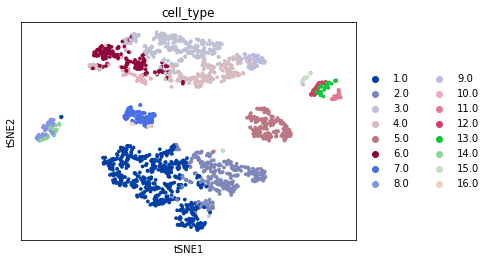

In [73]:
sc.pl.tsne(post_adata,color=['cell_type'])

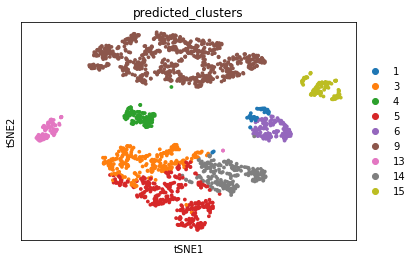

In [74]:
sc.pl.tsne(post_adata,color=['predicted_clusters'])

# Worm neuron

In [75]:
dataMgr = DataWithClusters(700, file_path="./data/with_cluster/worm_neuron_cell_select_2100.h5")

In [76]:
dataMgr.raw_data.obsm['X'].shape

(2100, 3461)

In [77]:
np.unique(dataMgr.raw_data.uns['Y'])

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [95]:
params = {
          'n_clusters'  : 10,
          'n_hidden'    : [1048,512,256,128],
          'latent_size' : 32,
          'warm_up_epoch': 20,
          'epochs'      : 200,
          'warm_up_clusters': 5.,
          'learning_rate': 1e-2
        }

In [96]:
gmvae = GMVAE(
  n_input=dataMgr.getX().shape[1], 
  n_hidden=params['n_hidden'], 
  latent_size=params['latent_size'], 
  n_clusters=params['n_clusters']
)

In [97]:
# different learning rate here !!!!!
# x=iter(dataMgr.train_loader).next()['x']
# gmvae.init_gmm(x)

# train(
#   gmvae, 
#   train_loader=dataMgr.train_loader,      # Added validation loader (split parameter in datamgr must be > 0)
#   num_epochs=params['epochs'],
#   warm_up_epoch = params['warm_up_epoch'],
#   weight_decay=1e-6,
#   learning_rate= params['learning_rate'],
#   seed=1,
#     warm_up_clusters = params['warm_up_clusters'],
#     mmd_ind=False,
#     file_ind =False,
#   verbose=True,                           # Added verbose parameter
#   patience=10,                             # Added patience parameter
#     save_file="worm_neuron.pt")
gmvae.load_state_dict(torch.load("modelDeepGMM/worm_neuron.pt")['State Dict'])

Learning Rate = 0.01
Score: -0.0000
Training: Epoch[1/200], Step [0/3],  Loss: 1055.4592, KL Z: 963.0455, KL Y: 0.0000, Recon Loss: 1055.4592, MMD: 0.0000, Mean prob: 0.1000
Score: -0.0000
Training: Epoch[1/200], Step [1/3],  Loss: 782.7793, KL Z: 1007.1801, KL Y: 0.0000, Recon Loss: 782.7793, MMD: 0.0000, Mean prob: 0.1000
Score: -0.0000
Training: Epoch[1/200], Step [2/3],  Loss: 577.1793, KL Z: 1110.3943, KL Y: 0.0000, Recon Loss: 577.1793, MMD: 0.0000, Mean prob: 0.1000
Learning Rate = 0.009999383162408303
Score: -0.0000
Training: Epoch[2/200], Step [0/3],  Loss: 502.3580, KL Z: 1286.8875, KL Y: 0.0000, Recon Loss: 438.0136, MMD: 0.0000, Mean prob: 0.1000
Score: -0.0000
Training: Epoch[2/200], Step [1/3],  Loss: 404.9771, KL Z: 824.7072, KL Y: -0.0563, Recon Loss: 363.7423, MMD: 0.0000, Mean prob: 0.1000
Score: -0.0000
Training: Epoch[2/200], Step [2/3],  Loss: 330.4374, KL Z: 444.9364, KL Y: -0.1175, Recon Loss: 308.1917, MMD: 0.0000, Mean prob: 0.1000
Learning Rate = 0.00999753280

Score: 0.6325
Training: Epoch[18/200], Step [0/3],  Loss: 194.3997, KL Z: 6.2036, KL Y: 0.3668, Recon Loss: 189.0643, MMD: 0.0000, Mean prob: 0.9474
Score: 0.6646
Training: Epoch[18/200], Step [1/3],  Loss: 197.6142, KL Z: 6.1528, KL Y: 0.3705, Recon Loss: 192.3213, MMD: 0.0000, Mean prob: 0.9561
Score: 0.6389
Training: Epoch[18/200], Step [2/3],  Loss: 195.6404, KL Z: 5.9516, KL Y: 0.3520, Recon Loss: 190.5217, MMD: 0.0000, Mean prob: 0.9501
Learning Rate = 0.009801468428384716
Score: 0.6409
Training: Epoch[19/200], Step [0/3],  Loss: 198.3946, KL Z: 6.1139, KL Y: 0.3212, Recon Loss: 192.8343, MMD: 0.0000, Mean prob: 0.9547
Score: 0.6602
Training: Epoch[19/200], Step [1/3],  Loss: 196.2856, KL Z: 6.0952, KL Y: 0.3615, Recon Loss: 190.7348, MMD: 0.0000, Mean prob: 0.9529
Score: 0.6696
Training: Epoch[19/200], Step [2/3],  Loss: 190.5611, KL Z: 6.3368, KL Y: 0.3644, Recon Loss: 184.7924, MMD: 0.0000, Mean prob: 0.9607
Learning Rate = 0.00977896507399165
Score: 0.6167
Training: Epoch[20/

Score: 0.7049
Training: Epoch[35/200], Step [0/3],  Loss: 183.1115, KL Z: 5.9696, KL Y: -0.0123, Recon Loss: 177.1461, MMD: 0.0000, Mean prob: 0.9840
Score: 0.6904
Training: Epoch[35/200], Step [1/3],  Loss: 179.4967, KL Z: 6.6468, KL Y: -0.0269, Recon Loss: 172.8590, MMD: 0.0000, Mean prob: 0.9787
Score: 0.6712
Training: Epoch[35/200], Step [2/3],  Loss: 180.8766, KL Z: 7.0303, KL Y: -0.0414, Recon Loss: 173.8604, MMD: 0.0000, Mean prob: 0.9805
Learning Rate = 0.009263200821770462
Score: 0.6760
Training: Epoch[36/200], Step [0/3],  Loss: 178.1781, KL Z: 6.4021, KL Y: -0.0348, Recon Loss: 171.7882, MMD: 0.0000, Mean prob: 0.9779
Score: 0.6992
Training: Epoch[36/200], Step [1/3],  Loss: 180.6817, KL Z: 6.3658, KL Y: -0.0421, Recon Loss: 174.3307, MMD: 0.0000, Mean prob: 0.9857
Score: 0.7008
Training: Epoch[36/200], Step [2/3],  Loss: 181.8632, KL Z: 6.3087, KL Y: -0.0520, Recon Loss: 175.5726, MMD: 0.0000, Mean prob: 0.9839
Learning Rate = 0.009221639627510075
Score: 0.6792
Training: Ep

Score: 0.7008
Training: Epoch[52/200], Step [0/3],  Loss: 168.1456, KL Z: 6.9044, KL Y: -0.3018, Recon Loss: 161.3951, MMD: 0.0000, Mean prob: 0.9876
Score: 0.6920
Training: Epoch[52/200], Step [1/3],  Loss: 170.5361, KL Z: 7.0843, KL Y: -0.3091, Recon Loss: 163.6094, MMD: 0.0000, Mean prob: 0.9905
Score: 0.6920
Training: Epoch[52/200], Step [2/3],  Loss: 169.0546, KL Z: 6.9433, KL Y: -0.3213, Recon Loss: 162.2752, MMD: 0.0000, Mean prob: 0.9875
Learning Rate = 0.008422735529643444
Score: 0.6855
Training: Epoch[53/200], Step [0/3],  Loss: 168.3437, KL Z: 6.9754, KL Y: -0.3163, Recon Loss: 161.5327, MMD: 0.0000, Mean prob: 0.9877
Score: 0.6929
Training: Epoch[53/200], Step [1/3],  Loss: 169.2720, KL Z: 6.9226, KL Y: -0.3297, Recon Loss: 162.5208, MMD: 0.0000, Mean prob: 0.9888
Score: 0.7037
Training: Epoch[53/200], Step [2/3],  Loss: 168.8751, KL Z: 7.1684, KL Y: -0.3314, Recon Loss: 161.8791, MMD: 0.0000, Mean prob: 0.9900
Learning Rate = 0.008365062567548867
Score: 0.7039
Training: Ep

Learning Rate = 0.0074087683705085765
Score: 0.6766
Training: Epoch[69/200], Step [0/3],  Loss: 161.0996, KL Z: 7.5196, KL Y: -0.5022, Recon Loss: 153.9215, MMD: 0.0000, Mean prob: 0.9879
Score: 0.6900
Training: Epoch[69/200], Step [1/3],  Loss: 157.1583, KL Z: 7.6396, KL Y: -0.5216, Recon Loss: 149.8734, MMD: 0.0000, Mean prob: 0.9888
Score: 0.7209
Training: Epoch[69/200], Step [2/3],  Loss: 161.8466, KL Z: 8.0183, KL Y: -0.5207, Recon Loss: 154.1824, MMD: 0.0000, Mean prob: 0.9861
Learning Rate = 0.007339649071302867
Score: 0.6952
Training: Epoch[70/200], Step [0/3],  Loss: 158.1570, KL Z: 7.9254, KL Y: -0.5055, Recon Loss: 150.5805, MMD: 0.0000, Mean prob: 0.9878
Score: 0.6815
Training: Epoch[70/200], Step [1/3],  Loss: 159.5054, KL Z: 7.6589, KL Y: -0.5172, Recon Loss: 152.2034, MMD: 0.0000, Mean prob: 0.9883
Score: 0.6999
Training: Epoch[70/200], Step [2/3],  Loss: 161.6481, KL Z: 7.7415, KL Y: -0.5367, Recon Loss: 154.2770, MMD: 0.0000, Mean prob: 0.9869
Learning Rate = 0.0072699

Score: 0.7032
Training: Epoch[86/200], Step [0/3],  Loss: 149.9774, KL Z: 8.4335, KL Y: -0.6751, Recon Loss: 142.1177, MMD: 0.0000, Mean prob: 0.9882
Score: 0.6927
Training: Epoch[86/200], Step [1/3],  Loss: 153.9341, KL Z: 8.8687, KL Y: -0.6689, Recon Loss: 145.6340, MMD: 0.0000, Mean prob: 0.9874
Score: 0.6828
Training: Epoch[86/200], Step [2/3],  Loss: 152.7302, KL Z: 8.5220, KL Y: -0.6863, Recon Loss: 144.7916, MMD: 0.0000, Mean prob: 0.9817
Learning Rate = 0.0060907162069827134
Score: 0.6949
Training: Epoch[87/200], Step [0/3],  Loss: 149.4321, KL Z: 8.4185, KL Y: -0.6885, Recon Loss: 141.6057, MMD: 0.0000, Mean prob: 0.9863
Score: 0.6552
Training: Epoch[87/200], Step [1/3],  Loss: 151.7694, KL Z: 8.9692, KL Y: -0.6953, Recon Loss: 143.3982, MMD: 0.0000, Mean prob: 0.9854
Score: 0.7237
Training: Epoch[87/200], Step [2/3],  Loss: 154.1478, KL Z: 8.7767, KL Y: -0.6845, Recon Loss: 145.9598, MMD: 0.0000, Mean prob: 0.9857
Learning Rate = 0.006013936476782563
Score: 0.7071
Training: E

Learning Rate = 0.004842946204609359
Score: 0.6785
Training: Epoch[103/200], Step [0/3],  Loss: 143.4706, KL Z: 9.2741, KL Y: -0.7847, Recon Loss: 134.9811, MMD: 0.0000, Mean prob: 0.9846
Score: 0.6713
Training: Epoch[103/200], Step [1/3],  Loss: 146.9418, KL Z: 9.1132, KL Y: -0.7992, Recon Loss: 138.6278, MMD: 0.0000, Mean prob: 0.9801
Score: 0.7241
Training: Epoch[103/200], Step [2/3],  Loss: 146.3934, KL Z: 8.9464, KL Y: -0.7907, Recon Loss: 138.2377, MMD: 0.0000, Mean prob: 0.9821
Learning Rate = 0.004764467746451787
Score: 0.6840
Training: Epoch[104/200], Step [0/3],  Loss: 144.6001, KL Z: 9.1736, KL Y: -0.8048, Recon Loss: 136.2313, MMD: 0.0000, Mean prob: 0.9799
Score: 0.6916
Training: Epoch[104/200], Step [1/3],  Loss: 144.7752, KL Z: 9.1731, KL Y: -0.7984, Recon Loss: 136.4005, MMD: 0.0000, Mean prob: 0.9857
Score: 0.6946
Training: Epoch[104/200], Step [2/3],  Loss: 146.2905, KL Z: 9.3313, KL Y: -0.8048, Recon Loss: 137.7641, MMD: 0.0000, Mean prob: 0.9807
Learning Rate = 0.00

Learning Rate = 0.003529798373838481
Score: 0.6731
Training: Epoch[120/200], Step [0/3],  Loss: 137.6568, KL Z: 9.7030, KL Y: -0.8821, Recon Loss: 128.8359, MMD: 0.0000, Mean prob: 0.9787
Score: 0.7033
Training: Epoch[120/200], Step [1/3],  Loss: 140.3474, KL Z: 9.9579, KL Y: -0.8759, Recon Loss: 131.2655, MMD: 0.0000, Mean prob: 0.9820
Score: 0.6964
Training: Epoch[120/200], Step [2/3],  Loss: 141.4355, KL Z: 9.7164, KL Y: -0.8867, Recon Loss: 132.6058, MMD: 0.0000, Mean prob: 0.9798
Learning Rate = 0.0034549150281252645
Score: 0.6896
Training: Epoch[121/200], Step [0/3],  Loss: 138.5184, KL Z: 9.6972, KL Y: -0.8832, Recon Loss: 129.7043, MMD: 0.0000, Mean prob: 0.9808
Score: 0.6865
Training: Epoch[121/200], Step [1/3],  Loss: 139.6519, KL Z: 9.9989, KL Y: -0.8852, Recon Loss: 130.5382, MMD: 0.0000, Mean prob: 0.9792
Score: 0.6968
Training: Epoch[121/200], Step [2/3],  Loss: 141.9466, KL Z: 9.8537, KL Y: -0.8788, Recon Loss: 132.9717, MMD: 0.0000, Mean prob: 0.9791
Learning Rate = 0.0

Score: 0.6968
Training: Epoch[136/200], Step [2/3],  Loss: 137.6317, KL Z: 9.8955, KL Y: -0.9341, Recon Loss: 128.6703, MMD: 0.0000, Mean prob: 0.9779
Learning Rate = 0.0023208660251050157
Score: 0.6860
Training: Epoch[137/200], Step [0/3],  Loss: 134.1562, KL Z: 9.8998, KL Y: -0.9399, Recon Loss: 125.1962, MMD: 0.0000, Mean prob: 0.9784
Score: 0.6946
Training: Epoch[137/200], Step [1/3],  Loss: 135.4536, KL Z: 10.0609, KL Y: -0.9473, Recon Loss: 126.3400, MMD: 0.0000, Mean prob: 0.9764
Score: 0.6917
Training: Epoch[137/200], Step [2/3],  Loss: 137.4488, KL Z: 10.6809, KL Y: -0.9474, Recon Loss: 127.7153, MMD: 0.0000, Mean prob: 0.9740
Learning Rate = 0.0022548859100093403
Score: 0.6953
Training: Epoch[138/200], Step [0/3],  Loss: 135.2315, KL Z: 10.0984, KL Y: -0.9402, Recon Loss: 126.0734, MMD: 0.0000, Mean prob: 0.9759
Score: 0.6939
Training: Epoch[138/200], Step [1/3],  Loss: 135.3034, KL Z: 10.1511, KL Y: -0.9390, Recon Loss: 126.0912, MMD: 0.0000, Mean prob: 0.9780
Score: 0.6820


Score: 0.6984
Training: Epoch[153/200], Step [1/3],  Loss: 133.6763, KL Z: 10.2954, KL Y: -0.9789, Recon Loss: 124.3598, MMD: 0.0000, Mean prob: 0.9754
Score: 0.6838
Training: Epoch[153/200], Step [2/3],  Loss: 133.1326, KL Z: 10.4956, KL Y: -0.9779, Recon Loss: 123.6149, MMD: 0.0000, Mean prob: 0.9740
Learning Rate = 0.0013018445251069511
Score: 0.6842
Training: Epoch[154/200], Step [0/3],  Loss: 133.9807, KL Z: 10.4414, KL Y: -0.9730, Recon Loss: 124.5123, MMD: 0.0000, Mean prob: 0.9750
Score: 0.6959
Training: Epoch[154/200], Step [1/3],  Loss: 134.1020, KL Z: 10.4806, KL Y: -0.9830, Recon Loss: 124.6044, MMD: 0.0000, Mean prob: 0.9771
Score: 0.6842
Training: Epoch[154/200], Step [2/3],  Loss: 130.2691, KL Z: 10.3361, KL Y: -0.9827, Recon Loss: 120.9157, MMD: 0.0000, Mean prob: 0.9726
Learning Rate = 0.001249444651847702
Score: 0.6720
Training: Epoch[155/200], Step [0/3],  Loss: 130.2090, KL Z: 10.4881, KL Y: -0.9790, Recon Loss: 120.6998, MMD: 0.0000, Mean prob: 0.9730
Score: 0.7228

Learning Rate = 0.0005811718495565327
Score: 0.6916
Training: Epoch[170/200], Step [0/3],  Loss: 127.6603, KL Z: 10.4476, KL Y: -0.9981, Recon Loss: 118.2108, MMD: 0.0000, Mean prob: 0.9721
Score: 0.6727
Training: Epoch[170/200], Step [1/3],  Loss: 132.1022, KL Z: 10.6248, KL Y: -0.9962, Recon Loss: 122.4736, MMD: 0.0000, Mean prob: 0.9709
Score: 0.7021
Training: Epoch[170/200], Step [2/3],  Loss: 131.9946, KL Z: 10.5936, KL Y: -0.9923, Recon Loss: 122.3933, MMD: 0.0000, Mean prob: 0.9787
Learning Rate = 0.0005449673790581611
Score: 0.6917
Training: Epoch[171/200], Step [0/3],  Loss: 131.1150, KL Z: 10.6102, KL Y: -0.9928, Recon Loss: 121.4975, MMD: 0.0000, Mean prob: 0.9723
Score: 0.7099
Training: Epoch[171/200], Step [1/3],  Loss: 131.4812, KL Z: 10.3313, KL Y: -0.9916, Recon Loss: 122.1415, MMD: 0.0000, Mean prob: 0.9774
Score: 0.6676
Training: Epoch[171/200], Step [2/3],  Loss: 130.1909, KL Z: 10.7402, KL Y: -0.9992, Recon Loss: 120.4499, MMD: 0.0000, Mean prob: 0.9713
Learning Rat

Score: 0.7077
Training: Epoch[186/200], Step [2/3],  Loss: 130.1929, KL Z: 10.6346, KL Y: -0.9964, Recon Loss: 120.5547, MMD: 0.0000, Mean prob: 0.9770
Learning Rate = 0.00012041619030626339
Score: 0.6682
Training: Epoch[187/200], Step [0/3],  Loss: 130.4535, KL Z: 10.7783, KL Y: -1.0042, Recon Loss: 120.6794, MMD: 0.0000, Mean prob: 0.9725
Score: 0.7133
Training: Epoch[187/200], Step [1/3],  Loss: 128.4861, KL Z: 10.5142, KL Y: -0.9987, Recon Loss: 118.9706, MMD: 0.0000, Mean prob: 0.9767
Score: 0.6792
Training: Epoch[187/200], Step [2/3],  Loss: 130.6845, KL Z: 10.5984, KL Y: -1.0051, Recon Loss: 121.0912, MMD: 0.0000, Mean prob: 0.9717
Learning Rate = 0.0001038859468911707
Score: 0.6980
Training: Epoch[188/200], Step [0/3],  Loss: 131.2948, KL Z: 10.6929, KL Y: -1.0153, Recon Loss: 121.6173, MMD: 0.0000, Mean prob: 0.9755
Score: 0.6762
Training: Epoch[188/200], Step [1/3],  Loss: 128.9999, KL Z: 10.8007, KL Y: -0.9988, Recon Loss: 119.1980, MMD: 0.0000, Mean prob: 0.9691
Score: 0.69

130.27774047851562

In [98]:
latent_y = gmvae.get_latent_y(torch.Tensor(dataMgr.getX()))  # Latent y
guesses = np.argmax(latent_y, 1)


In [99]:
guesses.unique()

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [100]:
NMI(dataMgr.raw_data.uns['Y'], guesses)

0.6796370860906167

In [101]:
ARI(dataMgr.raw_data.uns['Y'],guesses)

0.5937083494505089

In [102]:
latent_z = gmvae.get_latent_z(torch.Tensor(dataMgr.getX()))  # Latent y

In [103]:
post_adata = sc.AnnData(X=dataMgr.getX().numpy())
post_adata.obsm["X_latent"] = latent_z.cpu().detach().numpy()

In [104]:
post_adata.obs['cell_type'] = dataMgr.raw_data.obs['precise_clusters'].values.astype('str')
post_adata.obs['predicted_clusters'] = guesses.numpy().astype('str')

... storing 'cell_type' as categorical
... storing 'predicted_clusters' as categorical


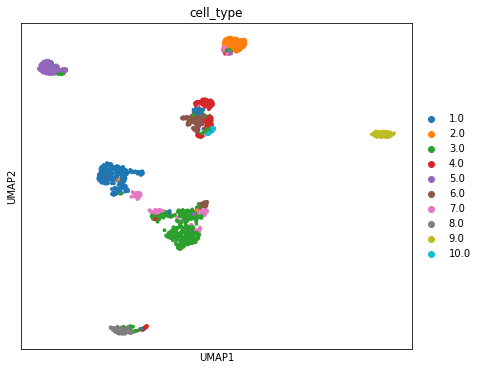

In [105]:
#post_adata.obs['cell_type'] = [labels[guess] for guess in guesses]
sc.pp.neighbors(post_adata, use_rep="X_latent", n_neighbors=15)
sc.tl.umap(post_adata, min_dist=0.1)
fig, ax = plt.subplots(figsize=(7, 6))
sc.pl.umap(post_adata, color=["cell_type"], ax=ax)

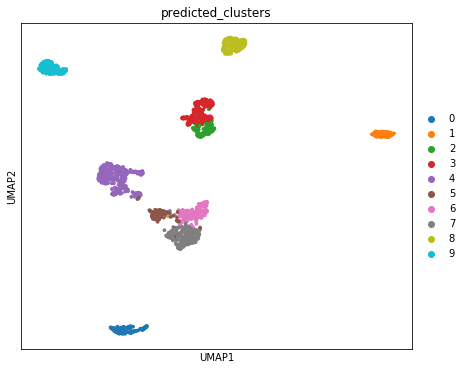

In [106]:
fig, ax = plt.subplots(figsize=(7, 6))
sc.pl.umap(post_adata, color=["predicted_clusters"], ax=ax)

In [107]:
sc.tl.tsne(post_adata, use_rep="X_latent")

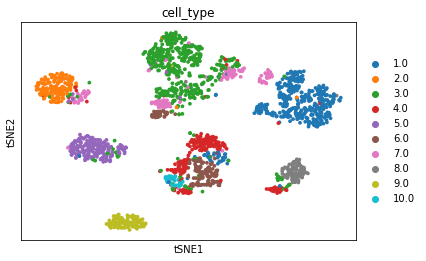

In [108]:
sc.pl.tsne(post_adata,color=['cell_type'])

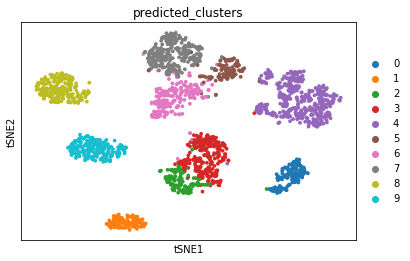

In [109]:
sc.pl.tsne(post_adata,color=['predicted_clusters'])

# PBMC Merging

In [110]:
dataMgr = PBMC_8k_4k(500)


In [111]:
dataMgr.train_data.obsm['X'].shape

(12721, 1382)

In [112]:
params = {
          'n_clusters'  : 8,
          'n_hidden'    : [512,256,128],
          'latent_size' : 32,
          'warm_up_epoch': 20,
          'epochs'      : 200,
          'warm_up_clusters': 5.,
          'learning_rate': 2e-3
        }

In [113]:
gmvae = GMVAE(
  n_input=dataMgr.getX().shape[1], 
  n_hidden=params['n_hidden'], 
  latent_size=params['latent_size'], 
  n_clusters=params['n_clusters']
)

In [114]:
# x=iter(dataMgr.train_loader).next()['x']
# gmvae.init_gmm(x)

# train(
#   gmvae, 
#   train_loader=dataMgr.train_loader,      # Added validation loader (split parameter in datamgr must be > 0)
#   num_epochs=params['epochs'],
#   warm_up_epoch = params['warm_up_epoch'],
#   weight_decay=1e-6,
#   learning_rate= params['learning_rate'],
#   seed=1,
#     warm_up_clusters = params['warm_up_clusters'],
#     mmd_ind=True,
#     NMI_ind=False,
#     file_ind =False,
#   verbose=True,                           # Added verbose parameter
#   patience=10,                             # Added patience parameter
#     save_file="pbmc_merge.pt")
gmvae.load_state_dict(torch.load("modelDeepGMM/pbmc_merge.pt")['State Dict'])

<All keys matched successfully>

In [115]:
latent_y = gmvae.get_latent_y(torch.Tensor(dataMgr.getX()))  # Latent y
guesses = np.argmax(latent_y, 1)


In [116]:
guesses.unique()

tensor([0, 1, 2, 4, 5, 6, 7])

In [118]:
latent_z = gmvae.get_latent_z(torch.Tensor(dataMgr.getX()))  # Latent y

In [119]:
post_adata = sc.AnnData(X=dataMgr.getX().numpy())
post_adata.obsm["X_latent"] = latent_z.cpu().detach().numpy()

In [122]:
post_adata.obs['batch'] = dataMgr.raw_data.obs['batch'].values.astype('str')
post_adata.obs['predicted_clusters'] = guesses.numpy().astype('str')

/home/grad/jiangyuanli/miniconda/envs/py37/lib/python3.7/site-packages/numba-0.45.0-py3.7-linux-x86_64.egg/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../miniconda/envs/py37/lib/python3.7/site-packages/umap_learn-0.3.10-py3.7.egg/umap/nndescent.py", line 46:
<source missing, REPL/exec in use?>

  self.func_ir.loc))
/home/grad/jiangyuanli/miniconda/envs/py37/lib/python3.7/site-packages/umap_learn-0.3.10-py3.7.egg/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
... storing 'batch' as categorical
... storing 'predicted_clusters' as categorical


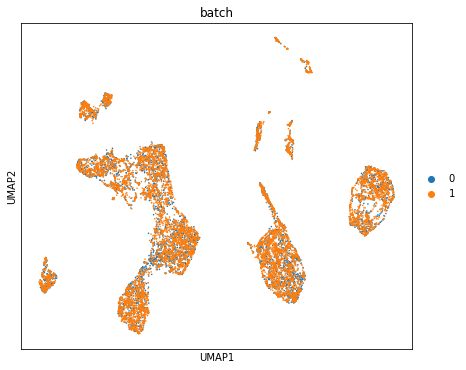

In [123]:
#post_adata.obs['cell_type'] = [labels[guess] for guess in guesses]
sc.pp.neighbors(post_adata, use_rep="X_latent", n_neighbors=15)
sc.tl.umap(post_adata, min_dist=0.1)
fig, ax = plt.subplots(figsize=(7, 6))
sc.pl.umap(post_adata, color=["batch"], ax=ax)

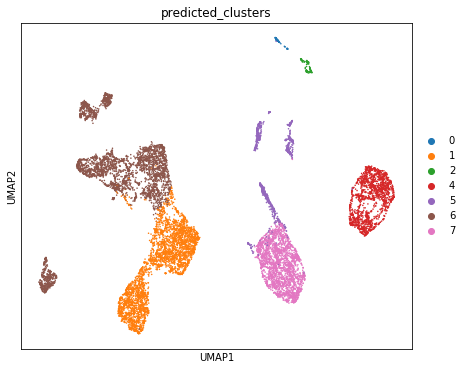

In [125]:
fig, ax = plt.subplots(figsize=(7, 6))
sc.pl.umap(post_adata, color=["predicted_clusters"], ax=ax)

In [127]:
sc.tl.tsne(post_adata, use_rep="X_latent")

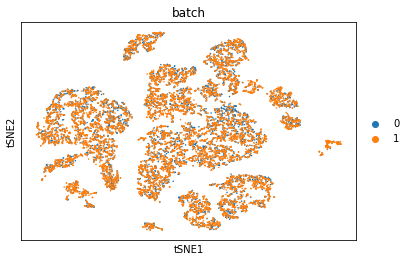

In [128]:
sc.pl.tsne(post_adata,color=['batch'])

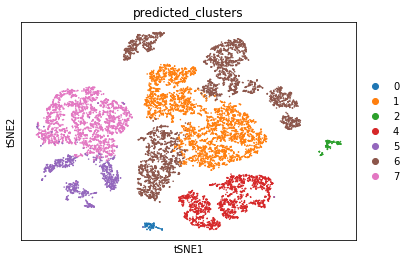

In [129]:
sc.pl.tsne(post_adata,color=['predicted_clusters'])